In [1028]:
!pip install matplotlib
!pip install seaborn==0.12 # because statannotations not support the latest

In [1029]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [1030]:
print(f"The installed seaborn verision is {sns.__version__}")

The installed seaborn verision is 0.12.0


In [1122]:
vanila = [13.0, 14.0, 16.6, 17.6, 19.9]
ci1 = [15.0, 16.2, 17.5, 18.0, 20.8]
ci2 = [11.5, 11.8, 15.2, 16.0, 16.4]
rl1 = [14.8, 16.9, 17.6, 18.7, 23.7]
rl2 = [13.8, 15.4, 15.9, 17.0, 20.4]
#
errs = np.concatenate((vanila, ci1, ci2, rl1, rl2))
#
traincond = []
for k in range(5):
    traincond.append('Vanilla')
for k in range(5):
    traincond.append('Balanced Training I')
for k in range(5):
    traincond.append('Balanced Training II')
for k in range(5):
    traincond.append('Robust Training I')
for k in range(5):
    traincond.append('Robust Training II')
#
datapercent = []
for k in range(5):
    datapercent.append('9 (100%)')
    datapercent.append('6 (66%)')
    datapercent.append('3 (33%)')
    datapercent.append('2 (22%)')
    datapercent.append('1 (11%)')

In [1123]:
d = {'Training Strategies': traincond, 'MAE': errs, 'Data Percent': datapercent}
df = pd.DataFrame(data=d)

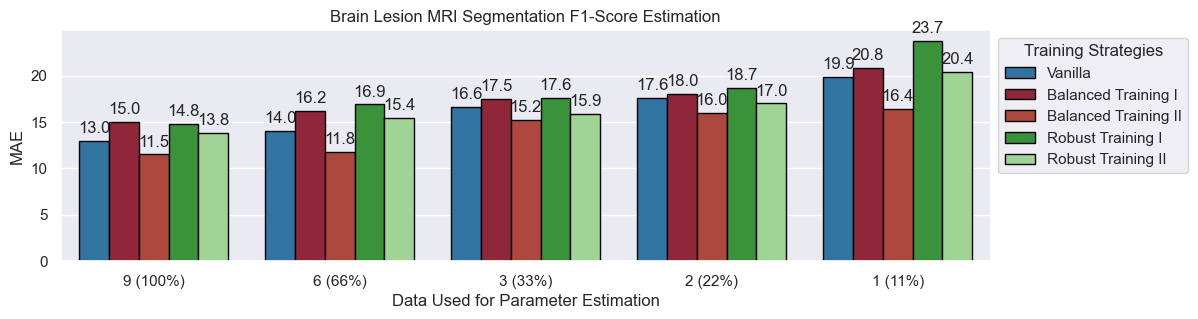

In [1124]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,3)})
category_palette = {
    'Vanilla': '#1f77b4',               # This color remains unchanged (blue)
    'Balanced Training I': '#A2142F',    # Red
    'Balanced Training II': '#C0392B',   # Lighter red or pink
    'Robust Training I': '#2ca02c',     # Green
    'Robust Training II': '#98df8a'     # Lighter green
}
ax = sns.barplot(df, 
                 x = 'Data Percent', 
                 y = 'MAE', 
                 hue= "Training Strategies", 
                 palette=category_palette,
                 edgecolor='black')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_xlabel('Data Used for Parameter Estimation')


plt.title('Brain Lesion MRI Segmentation F1-Score Estimation')

plt.savefig('Fig_brainlesion_ablation.pdf', bbox_inches='tight')

In [1125]:
# cardiac

In [1126]:
vanila = [3.5, 3.6, 4.0, 4.5, 5.2, 7.4]

In [1127]:
datapercent = []
datapercent.append('19\n(100%)')
datapercent.append('12\n(63%)')
datapercent.append('6\n(32%)')
datapercent.append('3\n(16%)')
datapercent.append('2\n(11%)')
datapercent.append('1\n(5%)')

In [1128]:
d = {'MAE': vanila, 'Data Percent': datapercent}
df = pd.DataFrame(data=d)

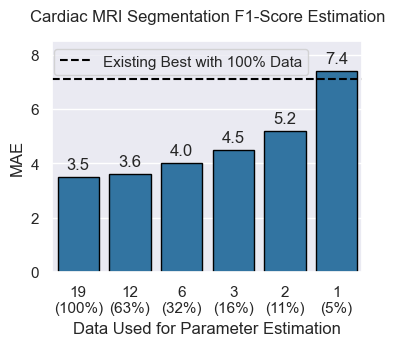

In [1129]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(4,3)})


ax = sns.barplot(df, 
                 x = 'Data Percent', 
                 y = 'MAE', 
                 color = '#1f77b4',
                 edgecolor='black')

ax.axhline(y=7.1, color='black', linestyle='--', label='Existing Best with 100% Data')

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_xlabel('Data Used for Parameter Estimation')

ax.set_ylim(0, 8.5)

plt.title('Cardiac MRI Segmentation F1-Score Estimation', y=1.05)

plt.savefig('Fig_cardic_ablation.pdf', bbox_inches='tight')

In [1130]:
# cifar10

In [1131]:
acc = [2.8, 2.8, 2.9, 3.4, 3.9, 4.6]
existing_acc = 4.1
sens = [9.5, 9.7, 11.0, 12.2, 16.4, 25.2]
existing_sens = 18.9
prec = [31.6, 32.0, 31.7, 32.0, 31.9, 32.8]
existing_prec = 32.7
f1 = [8.5, 8.7, 10.5, 11.4, 15.4, 20.4]
existing_f1 = 16.4
auc = [3.0, 3.0, 3.3, 3.6, 3.8, 4.0]
existing_auc = 3.6

In [1132]:
datapercent = []
datapercent.append('3000\n(100%)')
datapercent.append('1500\n(50%)')
datapercent.append('600\n(20%)')
datapercent.append('300\n(10%)')
datapercent.append('150\n(5%)')
datapercent.append('90\n(3%)')

In [1133]:
metric = acc
#
d = {'MAE': metric, 'Data Percent': datapercent}
df = pd.DataFrame(data=d)

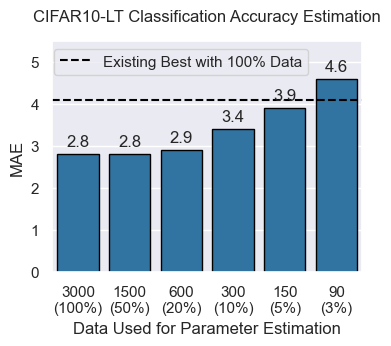

In [1134]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(4,3)})


ax = sns.barplot(df, 
                 x = 'Data Percent', 
                 y = 'MAE', 
                 color = '#1f77b4',
                 edgecolor='black')

ax.axhline(y=existing_acc, color='black', linestyle='--', label='Existing Best with 100% Data')

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_xlabel('Data Used for Parameter Estimation')

ax.set_ylim(0, 5.5)

plt.title('CIFAR10-LT Classification Accuracy Estimation', y=1.05)

plt.savefig('Fig_cifar_ablation_acc.pdf', bbox_inches='tight')

In [1135]:
metric = sens
#
d = {'MAE': metric, 'Data Percent': datapercent}
df = pd.DataFrame(data=d)

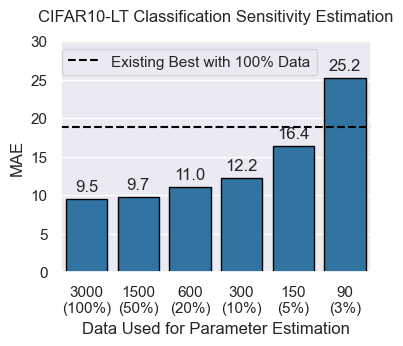

In [1136]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(4,3)})


ax = sns.barplot(df, 
                 x = 'Data Percent', 
                 y = 'MAE', 
                 color = '#1f77b4',
                 edgecolor='black')

ax.axhline(y=existing_sens, color='black', linestyle='--', label='Existing Best with 100% Data')

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_xlabel('Data Used for Parameter Estimation')

ax.set_ylim(0, 30)

plt.title('CIFAR10-LT Classification Sensitivity Estimation', y=1.05)

plt.savefig('Fig_cifar_ablation_sens.pdf', bbox_inches='tight')

In [1137]:
metric = prec
#
d = {'MAE': metric, 'Data Percent': datapercent}
df = pd.DataFrame(data=d)

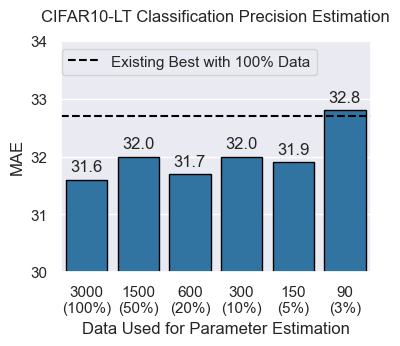

In [1138]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(4,3)})


ax = sns.barplot(df, 
                 x = 'Data Percent', 
                 y = 'MAE', 
                 color = '#1f77b4',
                 edgecolor='black')

ax.axhline(y=existing_prec, color='black', linestyle='--', label='Existing Best with 100% Data')

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_xlabel('Data Used for Parameter Estimation')

ax.set_ylim(30, 34) 

plt.title('CIFAR10-LT Classification Precision Estimation', y=1.05)

plt.savefig('Fig_cifar_ablation_prec.pdf', bbox_inches='tight')

In [1139]:
metric = f1
#
d = {'MAE': metric, 'Data Percent': datapercent}
df = pd.DataFrame(data=d)

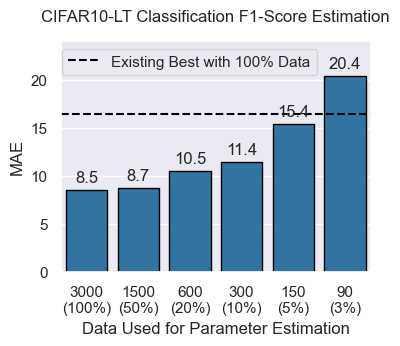

In [1140]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(4,3)})


ax = sns.barplot(df, 
                 x = 'Data Percent', 
                 y = 'MAE', 
                 color = '#1f77b4',
                 edgecolor='black')

ax.axhline(y=existing_f1, color='black', linestyle='--', label='Existing Best with 100% Data')

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_xlabel('Data Used for Parameter Estimation')

ax.set_ylim(0, 24) 

plt.title('CIFAR10-LT Classification F1-Score Estimation', y=1.05)

plt.savefig('Fig_cifar_ablation_f1.pdf', bbox_inches='tight')

In [1141]:
metric = auc
#
d = {'MAE': metric, 'Data Percent': datapercent}
df = pd.DataFrame(data=d)

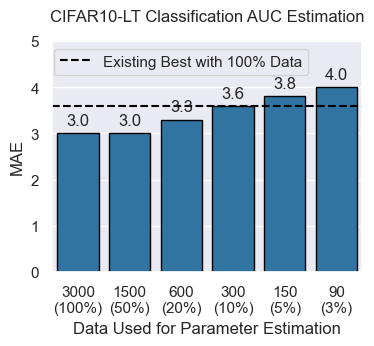

In [1142]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(4,3)})


ax = sns.barplot(df, 
                 x = 'Data Percent', 
                 y = 'MAE', 
                 color = '#1f77b4',
                 edgecolor='black')

ax.axhline(y=existing_auc, color='black', linestyle='--', label='Existing Best with 100% Data')

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_xlabel('Data Used for Parameter Estimation')

ax.set_ylim(0, 5) 

plt.title('CIFAR10-LT Classification AUC Estimation', y=1.05)

plt.savefig('Fig_cifar_ablation_auc.pdf', bbox_inches='tight')

In [1143]:
# get the performance

In [1144]:
with open('cls_f1.npy', 'rb') as f:
    cifar10_f1_res = np.load(f)
    cifar10_f1_gt = np.load(f)
    cifar10_f1_res_ensemble = np.load(f)
    cifar100_f1_res = np.load(f)
    cifar100_f1_gt = np.load(f)
    cifar100_f1_res_ensemble = np.load(f)
    skin_f1_res = np.load(f)
    skin_f1_gt = np.load(f)
    skin_f1_res_ensemble = np.load(f)
with open('cls_conds_f1.npy', 'rb') as f:
    cifar10ci1_f1_res = np.load(f)
    cifar10ci1_f1_gt = np.load(f)
    cifar10ci1_f1_res_ensemble = np.load(f)
    cifar10ci2_f1_res = np.load(f)
    cifar10ci2_f1_gt = np.load(f)
    cifar10ci2_f1_res_ensemble = np.load(f)
    cifar10rl1_f1_res = np.load(f)
    cifar10rl1_f1_gt = np.load(f)
    cifar10rl1_f1_res_ensemble = np.load(f)
    cifar10rl2_f1_res = np.load(f)
    cifar10rl2_f1_gt = np.load(f)
    cifar10rl2_f1_res_ensemble = np.load(f)
with open('seg3d_f1.npy', 'rb') as f:
    prostate_syn_f1_res = np.load(f)
    prostate_syn_f1_gt = np.load(f)
    prostate_syn_f1_res_ensemble = np.load(f)
    prostate_nat_f1_res = np.load(f)
    prostate_nat_f1_gt = np.load(f)
    prostate_nat_f1_res_ensemble = np.load(f)
    brain_syn_f1_res = np.load(f)
    brain_syn_f1_gt = np.load(f)
    brain_syn_f1_res_ensemble = np.load(f)
    brain_nat_f1_res = np.load(f)
    brain_nat_f1_gt = np.load(f)
    brain_nat_f1_res_ensemble = np.load(f)
with open('seg3d_conds_f1.npy', 'rb') as f:
    brainci1_syn_f1_res = np.load(f)
    brainci1_syn_f1_gt = np.load(f)
    brainci1_syn_f1_res_ensemble = np.load(f)
    brainci2_syn_f1_res = np.load(f)
    brainci2_syn_f1_gt = np.load(f)
    brainci2_syn_f1_res_ensemble = np.load(f)
    brainrl1_syn_f1_res = np.load(f)
    brainrl1_syn_f1_gt = np.load(f)
    brainrl1_syn_f1_res_ensemble = np.load(f)
    brainrl2_syn_f1_res = np.load(f)
    brainrl2_syn_f1_gt = np.load(f)
    brainrl2_syn_f1_res_ensemble = np.load(f)
    brainci1_nat_f1_res = np.load(f)
    brainci1_nat_f1_gt = np.load(f)
    brainci1_nat_f1_res_ensemble = np.load(f)
    brainci2_nat_f1_res = np.load(f)
    brainci2_nat_f1_gt = np.load(f)
    brainci2_nat_f1_res_ensemble = np.load(f)
    brainrl1_nat_f1_res = np.load(f)
    brainrl1_nat_f1_gt = np.load(f)
    brainrl1_nat_f1_res_ensemble = np.load(f)
    brainrl2_nat_f1_res = np.load(f)
    brainrl2_nat_f1_gt = np.load(f)
    brainrl2_nat_f1_res_ensemble = np.load(f)

In [1145]:
# get the data.

In [1055]:
# cifar10
diff_cifar10_f1 = np.mean(np.abs(cifar10_f1_res - cifar10_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_cifar10_f1 = np.mean(np.abs(cifar10_f1_res_ensemble - cifar10_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_cifar10_f1]
diffs_ensemb = [diff_ensemb_cifar10_f1]
diff_mean = np.mean(diff_cifar10_f1, axis = 1)

In [1056]:
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_ = np.min(err_mean_existing)
EXT_estim = estim_algorithms[np.argmin(err_mean_existing)] # w/ MCP
MOVAL_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score


In [1057]:
# cifar10ci1
diff_cifar10_f1 = np.mean(np.abs(cifar10ci1_f1_res - cifar10ci1_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_cifar10_f1 = np.mean(np.abs(cifar10ci1_f1_res_ensemble - cifar10ci1_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_cifar10_f1]
diffs_ensemb = [diff_ensemb_cifar10_f1]
diff_mean = np.mean(diff_cifar10_f1, axis = 1)

In [1058]:
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

             # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_ci1 = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_ci1 = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_ci1 = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_ci1 = np.min(err_mean_existing)
MOVAL_ci1 = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score


In [1059]:
# cifar10ci2
diff_cifar10_f1 = np.mean(np.abs(cifar10ci2_f1_res - cifar10ci2_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_cifar10_f1 = np.mean(np.abs(cifar10ci2_f1_res_ensemble - cifar10ci2_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_cifar10_f1]
diffs_ensemb = [diff_ensemb_cifar10_f1]
diff_mean = np.mean(diff_cifar10_f1, axis = 1)

In [1060]:
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

             # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_ci2 = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_ci2 = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_ci2 = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_ci2 = np.min(err_mean_existing)
MOVAL_ci2 = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score


In [1061]:
# cifar10rl1
diff_cifar10_f1 = np.mean(np.abs(cifar10rl1_f1_res - cifar10rl1_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_cifar10_f1 = np.mean(np.abs(cifar10rl1_f1_res_ensemble - cifar10rl1_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_cifar10_f1]
diffs_ensemb = [diff_ensemb_cifar10_f1]
diff_mean = np.mean(diff_cifar10_f1, axis = 1)

In [1062]:
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

             # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_rl1 = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_rl1 = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_rl1 = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_rl1 = np.min(err_mean_existing)
MOVAL_rl1 = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score


In [1063]:
# cifar10rl2
diff_cifar10_f1 = np.mean(np.abs(cifar10rl2_f1_res - cifar10rl2_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_cifar10_f1 = np.mean(np.abs(cifar10rl2_f1_res_ensemble - cifar10rl2_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_cifar10_f1]
diffs_ensemb = [diff_ensemb_cifar10_f1]
diff_mean = np.mean(diff_cifar10_f1, axis = 1)

In [1064]:
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

             # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_rl2 = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_rl2 = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_rl2 = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_rl2 = np.min(err_mean_existing)
MOVAL_rl2 = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score


In [1065]:
# get the number
AC_res = [AC_, AC_ci1, AC_ci2, AC_rl1, AC_rl2]
org_res = [ORG_, ORG_ci1, ORG_ci2, ORG_rl1, ORG_rl2]
cs_res = [CS_, CS_ci1, CS_ci2, CS_rl1, CS_rl2]
existing_best_res = [EXT_, EXT_ci1, EXT_ci2, EXT_rl1, EXT_rl2]
moval_res = [MOVAL_, MOVAL_ci1, MOVAL_ci2, MOVAL_rl1, MOVAL_rl2]

In [1066]:
def _invert(x, limits):
    """Inverts a value x on a scale from limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """Scales data[1:] to ranges[0], inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data, ranges):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)

    x1, x2 = ranges[0]
    d = data[0]

    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1

    sdata = [d]

    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1

        sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)

    return sdata

def set_rgrids(ax, radii, labels=None, angle=None, fmt=None, fontsize=16, **kwargs):
    ax.set_rticks(radii)
    if labels is not None:
        ax.set_yticklabels(labels, fontsize=fontsize)
    elif fmt is not None:
        ax.yaxis.set_major_formatter(FormatStrFormatter(fmt))
    
    if angle is None:
        angle = ax.get_rlabel_position()
        ax.set_rlabel_position(angle)
        
    for t in ax.yaxis.get_ticklabels():
        t.update(kwargs)
        t.set_fontsize(fontsize)  # Update font size here
        
    return ax.yaxis.get_gridlines(), ax.yaxis.get_ticklabels()

class ComplexRadar():
    def __init__(self, fig, variables, ranges, n_ordinate_levels=5):
        angles = np.arange(0, 360, 360. / len(variables))

        axes = [fig.add_axes([0.1, 0.1, 0.9, 0.9], polar=True, label=f"axes{i}") for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, labels=variables)
        [txt.set_rotation(angle) for txt, angle in zip(text, angles)]

        # Adjust font size and position of theta grid labels
        [txt.set_fontsize(14) for txt in text]  # Adjust font size as needed
        # Positions of theta grid labels
        positions = [(0., -0.05),  # Adjust this position for 0 degrees
                     (0.15450849718747373, -0.1902113032590307),
                     (0.40450849718747367, -0.11755705045849466),
                     (-0.4045084971874737, -0.11755705045849461),
                     (0.15450849718747361, -0.19021130325903074)]

        for txt, pos, angle in zip(text, positions, angles):
            txt.set_fontsize(20)  # Increase font size
            txt.set_position(pos)  # Set the adjusted position
            txt.set_rotation(angle)

        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)  # Hide radial axis labels

        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num=n_ordinate_levels)
            gridlabel = [f"{round(x, 2)}" for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1]
            gridlabel[0] = ""

            # Ensure correct alignment of grid labels with respective angles
            set_rgrids(ax, grid, labels=gridlabel, angle=90)  # Set angle to 90 for vertical alignment
            ax.set_ylim(*ranges[i])

        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        self.ax.set_theta_zero_location('N')
        self.ax.set_theta_direction(-1)

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, labels, **kwargs):
        self.ax.legend(labels, bbox_to_anchor=(1.5, 1.1), prop={'size': 20}, **kwargs)

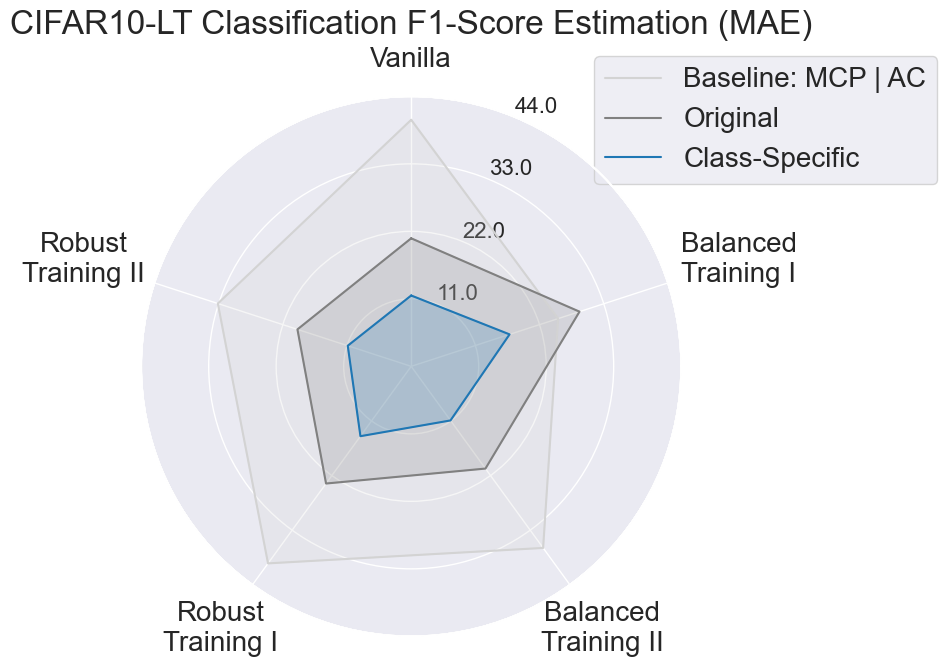

In [1067]:
# Example data
variables = ("Vanilla", "Balanced\nTraining I", "Balanced\nTraining II", "Robust\nTraining I", "Robust\nTraining II")
ranges = [(0, 44), (0, 44), (0, 44), (0, 44), (0, 44)]

# Plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)

radar.plot(AC_res, color='#d3d3d3')
radar.plot(org_res, color='grey')
radar.plot(cs_res, color='#1f77b4')

# Uncomment to plot additional data
radar.fill(AC_res, alpha=0.2, color='#d3d3d3')
radar.fill(org_res, alpha=0.2, color='grey')
radar.fill(cs_res, alpha=0.2, color='#1f77b4')


radar.legend(['Baseline: MCP | AC', 'Original', 'Class-Specific'])

plt.title('CIFAR10-LT Classification F1-Score Estimation (MAE)', y=1.1, fontsize=24)

plt.savefig('Fig_cifar_radar_cs.pdf', bbox_inches='tight')

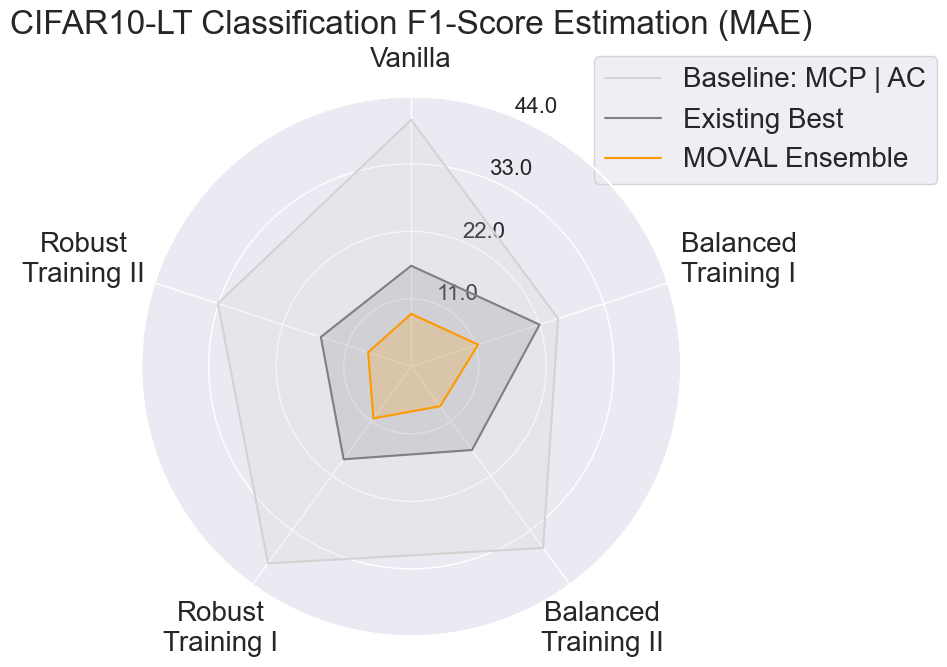

In [1068]:
# Example data
variables = ("Vanilla", "Balanced\nTraining I", "Balanced\nTraining II", "Robust\nTraining I", "Robust\nTraining II")
ranges = [(0, 44), (0, 44), (0, 44), (0, 44), (0, 44)]

# Plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)

radar.plot(AC_res, color='#d3d3d3')
radar.plot(existing_best_res, color='grey')
radar.plot(moval_res, color='#ff9900')

# Uncomment to plot additional data
radar.fill(AC_res, alpha=0.2, color='#d3d3d3')
radar.fill(existing_best_res, alpha=0.2, color='grey')
radar.fill(moval_res, alpha=0.2, color='#ff9900')

plt.title('CIFAR10-LT Classification F1-Score Estimation (MAE)', y=1.1, fontsize=24)

radar.legend(['Baseline: MCP | AC', 'Existing Best', 'MOVAL Ensemble'])

plt.savefig('Fig_cifar_radar.pdf', bbox_inches='tight')

In [1101]:
brainsel = brain_sel

In [1102]:
# brain_syn
diff_brain_f1 = np.mean(np.abs(brain_syn_f1_res[brainsel, :, :, :] - brain_syn_f1_gt[brainsel, :, :, :]), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brain_f1 = np.mean(np.abs(brain_syn_f1_res_ensemble[brainsel, :, :, :] - brain_syn_f1_gt[brainsel, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brain_f1]
diffs_ensemb = [diff_ensemb_brain_f1]
diff_mean = np.mean(diff_brain_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_syn_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_syn_ = np.min(err_mean_existing)
MOVAL_syn_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])
##
# brain_nat
diff_brain_f1 = np.mean(np.abs(brain_nat_f1_res - brain_nat_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brain_f1 = np.mean(np.abs(brain_nat_f1_res_ensemble - brain_nat_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brain_f1]
diffs_ensemb = [diff_ensemb_brain_f1]
diff_mean = np.mean(diff_brain_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_nat_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_nat_ = np.min(err_mean_existing)
MOVAL_nat_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score
F1-Score


In [1103]:
AC_ = np.mean((AC_syn_, AC_nat_))
ORG_ = np.mean((ORG_syn_, ORG_nat_))
CS_ = np.mean((CS_syn_, CS_nat_))
EXT_ = np.mean((EXT_syn_, EXT_nat_))
MOVAL_ = np.mean((MOVAL_syn_, MOVAL_nat_))

In [1104]:
# brainci1_syn
diff_brainci1_f1 = np.mean(np.abs(brainci1_syn_f1_res[brainsel, :, :, :] - brainci1_syn_f1_gt[brainsel, :, :, :]), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainci1_f1 = np.mean(np.abs(brainci1_syn_f1_res_ensemble[brainsel, :, :, :] - brainci1_syn_f1_gt[brainsel, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainci1_f1]
diffs_ensemb = [diff_ensemb_brainci1_f1]
diff_mean = np.mean(diff_brainci1_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_syn_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_syn_ = np.min(err_mean_existing)
MOVAL_syn_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])
##
# brainci1_nat
diff_brainci1_f1 = np.mean(np.abs(brainci1_nat_f1_res - brainci1_nat_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainci1_f1 = np.mean(np.abs(brainci1_nat_f1_res_ensemble - brainci1_nat_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainci1_f1]
diffs_ensemb = [diff_ensemb_brainci1_f1]
diff_mean = np.mean(diff_brainci1_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_nat_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_nat_ = np.min(err_mean_existing)
MOVAL_nat_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score
F1-Score


In [1105]:
AC_ci1 = np.mean((AC_syn_, AC_nat_))
ORG_ci1 = np.mean((ORG_syn_, ORG_nat_))
CS_ci1 = np.mean((CS_syn_, CS_nat_))
EXT_ci1 = np.mean((EXT_syn_, EXT_nat_))
MOVAL_ci1 = np.mean((MOVAL_syn_, MOVAL_nat_))

In [1106]:
# brainci1_syn
diff_brainci1_f1 = np.mean(np.abs(brainci1_syn_f1_res[brainsel, :, :, :] - brainci1_syn_f1_gt[brainsel, :, :, :]), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainci1_f1 = np.mean(np.abs(brainci1_syn_f1_res_ensemble[brainsel, :, :, :] - brainci1_syn_f1_gt[brainsel, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainci1_f1]
diffs_ensemb = [diff_ensemb_brainci1_f1]
diff_mean = np.mean(diff_brainci1_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_syn_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_syn_ = np.min(err_mean_existing)
MOVAL_syn_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])
##
# brainci1_nat
diff_brainci1_f1 = np.mean(np.abs(brainci1_nat_f1_res - brainci1_nat_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainci1_f1 = np.mean(np.abs(brainci1_nat_f1_res_ensemble - brainci1_nat_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainci1_f1]
diffs_ensemb = [diff_ensemb_brainci1_f1]
diff_mean = np.mean(diff_brainci1_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_nat_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_nat_ = np.min(err_mean_existing)
MOVAL_nat_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score
F1-Score


In [1107]:
AC_ci2 = np.mean((AC_syn_, AC_nat_))
ORG_ci2 = np.mean((ORG_syn_, ORG_nat_))
CS_ci2 = np.mean((CS_syn_, CS_nat_))
EXT_ci2 = np.mean((EXT_syn_, EXT_nat_))
MOVAL_ci2 = np.mean((MOVAL_syn_, MOVAL_nat_))

In [1108]:
# brainrl1_syn
diff_brainrl1_f1 = np.mean(np.abs(brainrl1_syn_f1_res[brainsel, :, :, :] - brainrl1_syn_f1_gt[brainsel, :, :, :]), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainrl1_f1 = np.mean(np.abs(brainrl1_syn_f1_res_ensemble[brainsel, :, :, :] - brainrl1_syn_f1_gt[brainsel, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainrl1_f1]
diffs_ensemb = [diff_ensemb_brainrl1_f1]
diff_mean = np.mean(diff_brainrl1_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_syn_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_syn_ = np.min(err_mean_existing)
MOVAL_syn_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])
##
# brainrl1_nat
diff_brainrl1_f1 = np.mean(np.abs(brainrl1_nat_f1_res - brainrl1_nat_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainrl1_f1 = np.mean(np.abs(brainrl1_nat_f1_res_ensemble - brainrl1_nat_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainrl1_f1]
diffs_ensemb = [diff_ensemb_brainrl1_f1]
diff_mean = np.mean(diff_brainrl1_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_nat_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_nat_ = np.min(err_mean_existing)
MOVAL_nat_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])


F1-Score
F1-Score


In [1109]:
AC_rl1 = np.mean((AC_syn_, AC_nat_))
ORG_rl1 = np.mean((ORG_syn_, ORG_nat_))
CS_rl1 = np.mean((CS_syn_, CS_nat_))
EXT_rl1 = np.mean((EXT_syn_, EXT_nat_))
MOVAL_rl1 = np.mean((MOVAL_syn_, MOVAL_nat_))

In [1110]:
# brainrl2_syn
diff_brainrl2_f1 = np.mean(np.abs(brainrl2_syn_f1_res[brainsel, :, :, :] - brainrl2_syn_f1_gt[brainsel, :, :, :]), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainrl2_f1 = np.mean(np.abs(brainrl2_syn_f1_res_ensemble[brainsel, :, :, :] - brainrl2_syn_f1_gt[brainsel, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainrl2_f1]
diffs_ensemb = [diff_ensemb_brainrl2_f1]
diff_mean = np.mean(diff_brainrl2_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_syn_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_syn_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_syn_ = np.min(err_mean_existing)
MOVAL_syn_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])
##
# brainrl2_nat
diff_brainrl2_f1 = np.mean(np.abs(brainrl2_nat_f1_res - brainrl2_nat_f1_gt), axis=3).transpose([1, 0, 2]).reshape([36, -1])
diff_ensemb_brainrl2_f1 = np.mean(np.abs(brainrl2_nat_f1_res_ensemble - brainrl2_nat_f1_gt[:, 0:1, :, :]), axis=3).transpose([1, 0, 2]).reshape([1, -1])
#
diffs = [diff_brainrl2_f1]
diffs_ensemb = [diff_ensemb_brainrl2_f1]
diff_mean = np.mean(diff_brainrl2_f1, axis = 1)
#
# full
confs = ['MCP', 'Energy', 'Entropy', 'Doctor']
estimatation_metrics = ["F1-Score"]

estim = []
conf = []
errs = []
err_baseline = []
err_mean_existing = []
novel = []
metric = []
k_metrics = 0

for estimatation_metric in estimatation_metrics:
    diff = diffs[k_metrics]
    diff_ensemb = diffs_ensemb[k_metrics]
    k_metrics += 1
    k_option = 0
    if estimatation_metric in ["Accuracy", "Sensitivity", "F1-Score"]:
        estim_algorithms = ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']
    else:
        estim_algorithms = ['AC', 'TS', 'DoC']

    print(estimatation_metric)
    for _estim_algorithm in estim_algorithms:
        for _conf in confs:
            if _conf == 'MCP' and (_estim_algorithm in ['AC', 'TS', 'DoC', 'ATC', 'TS-ATC']):
                novel.append('Existing Methods')
                err_mean_existing.append(diff_mean[k_option] * 100)

            # class specific version
            if _estim_algorithm == 'AC':
                if _conf == 'MCP':
                    for _res in range(len(diff[k_option])):
                        conf.append(_conf)
                        estim.append('baseline')
                        errs.append(diff[k_option][_res] * 100)
                        metric.append(estimatation_metric)
                k_option += 1
                continue
    
            # class agnostic version
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Original')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            k_option += 1
    
            for _res in range(len(diff[k_option])):
                conf.append(_conf)
                estim.append('Class-Specific')
                errs.append(diff[k_option][_res] * 100)
                metric.append(estimatation_metric)
            
            k_option += 1
    
    for _res in range(len(diff_ensemb[0])):
        conf.append('MOVAL')
        estim.append('MOVAL\nEnsemble')
        errs.append(diff_ensemb[0][_res] * 100)
        metric.append(estimatation_metric)

d = {'Estimation Algorithm': estim, 'Confidence Score': conf, 'MAE': errs, 'Metric': metric}
df = pd.DataFrame(data=d)
#
AC_nat_ = np.mean(df[df['Estimation Algorithm'] == 'baseline']['MAE'])
ORG_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Original']['MAE'])
CS_nat_ = np.mean(df[df['Estimation Algorithm'] == 'Class-Specific']['MAE'])
EXT_nat_ = np.min(err_mean_existing)
MOVAL_nat_ = np.mean(df[df['Estimation Algorithm'] == 'MOVAL\nEnsemble']['MAE'])

F1-Score
F1-Score


In [1111]:
AC_rl2 = np.mean((AC_syn_, AC_nat_))
ORG_rl2 = np.mean((ORG_syn_, ORG_nat_))
CS_rl2 = np.mean((CS_syn_, CS_nat_))
EXT_rl2 = np.mean((EXT_syn_, EXT_nat_))
MOVAL_rl2 = np.mean((MOVAL_syn_, MOVAL_nat_))

In [1112]:
# get the number
AC_res = [AC_, AC_ci1, AC_ci2, AC_rl1, AC_rl2]
org_res = [ORG_, ORG_ci1, ORG_ci2, ORG_rl1, ORG_rl2]
cs_res = [CS_, CS_ci1, CS_ci2, CS_rl1, CS_rl2]
existing_best_res = [EXT_, EXT_ci1, EXT_ci2, EXT_rl1, EXT_rl2]
moval_res = [MOVAL_, MOVAL_ci1, MOVAL_ci2, MOVAL_rl1, MOVAL_rl2]

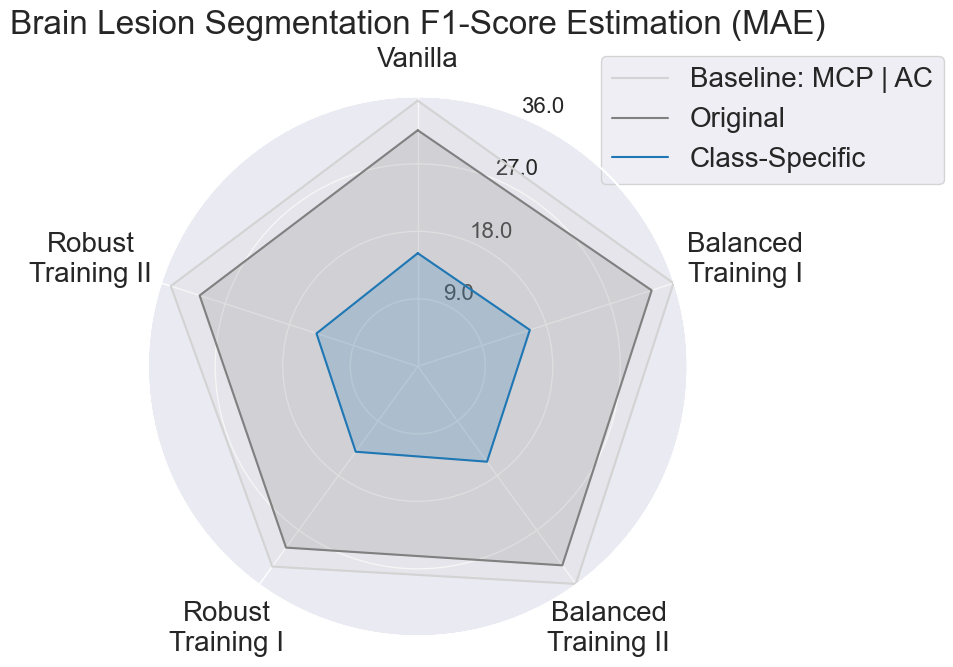

In [1113]:
# Example data
variables = ("Vanilla", "Balanced\nTraining I", "Balanced\nTraining II", "Robust\nTraining I", "Robust\nTraining II")
ranges = [(0, 36), (0, 36), (0, 36), (0, 36), (0, 36)]

# Plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)

radar.plot(AC_res, color='#d3d3d3')
radar.plot(org_res, color='grey')
radar.plot(cs_res, color='#1f77b4')

# Uncomment to plot additional data
radar.fill(AC_res, alpha=0.2, color='#d3d3d3')
radar.fill(org_res, alpha=0.2, color='grey')
radar.fill(cs_res, alpha=0.2, color='#1f77b4')


radar.legend(['Baseline: MCP | AC', 'Original', 'Class-Specific'])

plt.title('Brain Lesion Segmentation F1-Score Estimation (MAE)', y=1.1, fontsize=24)

plt.savefig('Fig_brain_radar_cs.pdf', bbox_inches='tight')

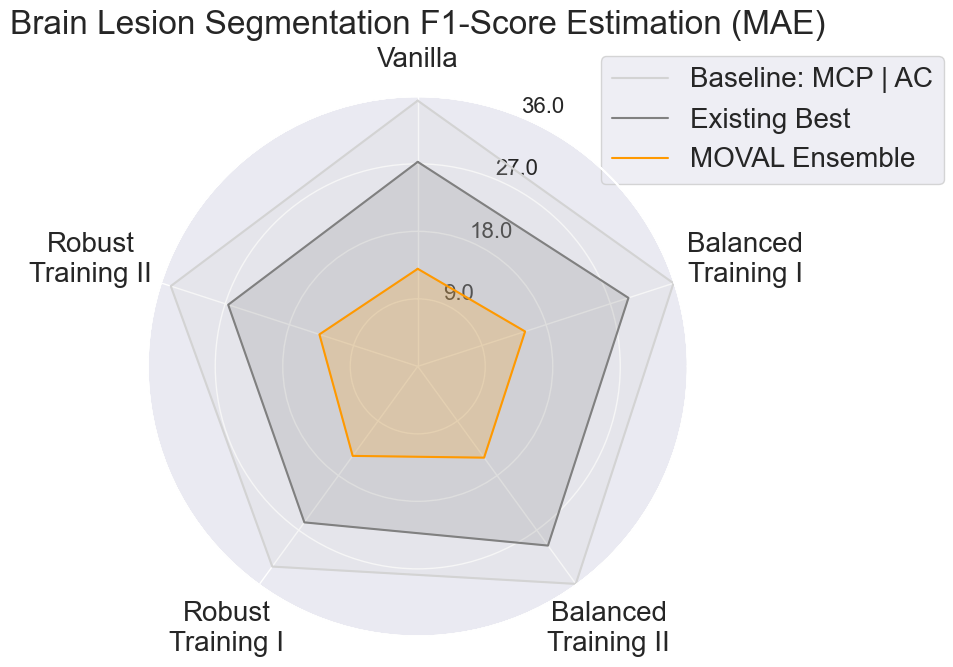

In [1116]:
# Example data
variables = ("Vanilla", "Balanced\nTraining I", "Balanced\nTraining II", "Robust\nTraining I", "Robust\nTraining II")
ranges = [(0, 36), (0, 36), (0, 36), (0, 36), (0, 36)]

# Plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)

radar.plot(AC_res, color='#d3d3d3')
radar.plot(existing_best_res, color='grey')
radar.plot(moval_res, color='#ff9900')

# Uncomment to plot additional data
radar.fill(AC_res, alpha=0.2, color='#d3d3d3')
radar.fill(existing_best_res, alpha=0.2, color='grey')
radar.fill(moval_res, alpha=0.2, color='#ff9900')

plt.title('Brain Lesion Segmentation F1-Score Estimation (MAE)', y=1.1, fontsize=24)

radar.legend(['Baseline: MCP | AC', 'Existing Best', 'MOVAL Ensemble'])

plt.savefig('Fig_brain_radar.pdf', bbox_inches='tight')

In [1115]:
# exclude the space transformations...
brain_sel = list(range(40, 82))

In [1084]:
# org
diff_syn = np.abs(brain_syn_f1_res_ensemble[brain_sel, :, :, :] - brain_syn_f1_gt[brain_sel, 0:1, :, :])[:, :, 0, 0]
diff_mean_syn = np.mean(diff_syn, axis = 0)
diff_std_syn =  np.std(diff_syn, axis = 0)
diff_nat = np.abs(brain_nat_f1_res_ensemble - brain_nat_f1_gt[:, 0:1, :, :])[:, :, 0, 0]
diff_mean_nat = np.mean(diff_nat, axis = 0)
print(f"\\ms{{{100 * diff_mean_syn[0]:.1f}}}{{{100 * diff_std_syn[0]:.1f}}}")
meanc = np.mean((diff_mean_syn, diff_mean_nat))
print(f"{100 * meanc:.1f}")

\ms{0.5}{0.6}
13.0


In [1085]:
# ci1
diff_syn = np.abs(brainci1_syn_f1_res_ensemble[brain_sel, :, :, :] - brainci1_syn_f1_gt[brain_sel, 0:1, :, :])[:, :, 0, 0]
diff_mean_syn = np.mean(diff_syn, axis = 0)
diff_std_syn =  np.std(diff_syn, axis = 0)
diff_nat = np.abs(brainci1_nat_f1_res_ensemble[:, :, :, :] - brainci1_nat_f1_gt[:, 0:1, :, :])[:, :, 0, 0]
diff_mean_nat = np.mean(diff_nat, axis = 0)
print(f"\\ms{{{100 * diff_mean_syn[0]:.1f}}}{{{100 * diff_std_syn[0]:.1f}}}")
meanc = np.mean((diff_mean_syn, diff_mean_nat))
print(f"{100 * meanc:.1f}")

\ms{0.5}{0.5}
15.0


In [1086]:
# ci2
diff_syn = np.abs(brainci2_syn_f1_res_ensemble[brain_sel, :, :, :] - brainci2_syn_f1_gt[brain_sel, 0:1, :, :])[:, :, 0, 0]
diff_mean_syn = np.mean(diff_syn, axis = 0)
diff_std_syn =  np.std(diff_syn, axis = 0)
diff_nat = np.abs(brainci2_nat_f1_res_ensemble[:, :, :, :] - brainci2_nat_f1_gt[:, 0:1, :, :])[:, :, 0, 0]
diff_mean_nat = np.mean(diff_nat, axis = 0)
print(f"\\ms{{{100 * diff_mean_syn[0]:.1f}}}{{{100 * diff_std_syn[0]:.1f}}}")
meanc = np.mean((diff_mean_syn, diff_mean_nat))
print(f"{100 * meanc:.1f}")

\ms{0.2}{0.3}
11.5


In [1087]:
# rl1
diff_syn = np.abs(brainrl1_syn_f1_res_ensemble[brain_sel, :, :, :] - brainrl1_syn_f1_gt[brain_sel, 0:1, :, :])[:, :, 0, 0]
diff_mean_syn = np.mean(diff_syn, axis = 0)
diff_std_syn =  np.std(diff_syn, axis = 0)
diff_nat = np.abs(brainrl1_nat_f1_res_ensemble[:, :, :, :] - brainrl1_nat_f1_gt[:, 0:1, :, :])[:, :, 0, 0]
diff_mean_nat = np.mean(diff_nat, axis = 0)
print(f"\\ms{{{100 * diff_mean_syn[0]:.1f}}}{{{100 * diff_std_syn[0]:.1f}}}")
meanc = np.mean((diff_mean_syn, diff_mean_nat))
print(f"{100 * meanc:.1f}")

\ms{0.9}{0.7}
14.8


In [1088]:
# rl2
diff_syn = np.abs(brainrl2_syn_f1_res_ensemble[brain_sel, :, :, :] - brainrl2_syn_f1_gt[brain_sel, 0:1, :, :])[:, :, 0, 0]
diff_mean_syn = np.mean(diff_syn, axis = 0)
diff_std_syn =  np.std(diff_syn, axis = 0)
diff_nat = np.abs(brainrl2_nat_f1_res_ensemble - brainrl2_nat_f1_gt[:, 0:1, :, :])[:, :, 0, 0]
diff_mean_nat = np.mean(diff_nat, axis = 0)
print(f"\\ms{{{100 * diff_mean_syn[0]:.1f}}}{{{100 * diff_std_syn[0]:.1f}}}")
meanc = np.mean((diff_mean_syn, diff_mean_nat))
print(f"{100 * meanc:.1f}")

\ms{0.6}{0.6}
13.8


In [1089]:
cifar_perf = [np.mean(cifar10_f1_gt), 
              np.mean(cifar10ci1_f1_gt), np.mean(cifar10ci2_f1_gt),
              np.mean(cifar10rl1_f1_gt), np.mean(cifar10rl2_f1_gt)]

In [1090]:
brain_perf = [(np.mean(brain_syn_f1_gt[brain_sel, :, :, :]) + np.mean(brain_nat_f1_gt) ) /2,
             (np.mean(brainci1_syn_f1_gt[brain_sel, :, :, :]) + np.mean(brainci1_nat_f1_gt)) / 2,
             (np.mean(brainci2_syn_f1_gt[brain_sel, :, :, :]) + np.mean(brainci2_nat_f1_gt)) / 2,
             (np.mean(brainrl1_syn_f1_gt[brain_sel, :, :, :]) + np.mean(brainrl1_nat_f1_gt) ) / 2,
             (np.mean(brainrl2_syn_f1_gt[brain_sel, :, :, :]) + np.mean(brainrl2_nat_f1_gt) ) / 2]
traincond = []
traincond.append('Vanilla')
traincond.append('Balanced\nTraining I')
traincond.append('Balanced\nTraining II')
traincond.append('Robust\nTraining I')
traincond.append('Robust\nTraining II')

In [1091]:
d = {'Training Strategies': traincond, 'F1-Score': [element * 100 for element in cifar_perf]}
df = pd.DataFrame(data=d)

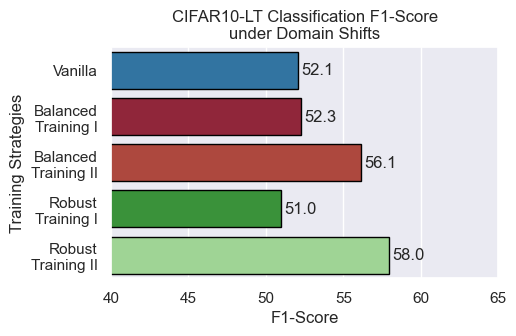

In [1092]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(5,3)})
category_palette = {
    'Vanilla': '#1f77b4',               # This color remains unchanged (blue)
    'Balanced\nTraining I': '#A2142F',    # Red
    'Balanced\nTraining II': '#C0392B',   # Lighter red or pink
    'Robust\nTraining I': '#2ca02c',     # Green
    'Robust\nTraining II': '#98df8a'     # Lighter green
}
ax = sns.barplot(df, 
                 y = 'Training Strategies', 
                 x = 'F1-Score',
                 palette=category_palette,
                 edgecolor='black')
# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (14, 0), 
                textcoords = 'offset points')

ax.set_xlim(40, 65) 

plt.title('CIFAR10-LT Classification F1-Score\nunder Domain Shifts')

plt.savefig('Fig_cifar_perf.pdf', bbox_inches='tight')

In [1093]:
d = {'Training Strategies': traincond, 'F1-Score': [element * 100 for element in brain_perf]}
df = pd.DataFrame(data=d)

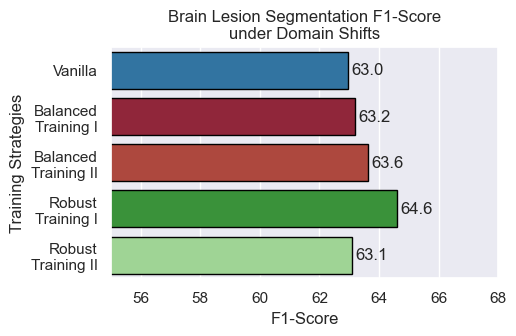

In [1094]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(5,3)})
category_palette = {
    'Vanilla': '#1f77b4',               # This color remains unchanged (blue)
    'Balanced\nTraining I': '#A2142F',    # Red
    'Balanced\nTraining II': '#C0392B',   # Lighter red or pink
    'Robust\nTraining I': '#2ca02c',     # Green
    'Robust\nTraining II': '#98df8a'     # Lighter green
}
ax = sns.barplot(df, 
                 y = 'Training Strategies', 
                 x = 'F1-Score',
                 palette=category_palette,
                 edgecolor='black')
# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (14, 0), 
                textcoords = 'offset points')

ax.set_xlim(55, 68) 

plt.title('Brain Lesion Segmentation F1-Score\nunder Domain Shifts')

plt.savefig('Fig_brain_perf.pdf', bbox_inches='tight')